# Pymaceuticals Inc.
---

### Analysis


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
numberOfMice = merged_data.groupby('Mouse ID').nunique()
len(numberOfMice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID_Timepoint_df = merged_data[["Mouse ID", "Timepoint"]]
duplicateRowsDF = ID_Timepoint_df[ID_Timepoint_df.duplicated()]
duplicateRowsDF

Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = merged_data[merged_data['Mouse ID']== "g989"]
g989_data


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_g989 = merged_data.drop(labels=[908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])
drop_g989

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [14]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = drop_g989.groupby('Mouse ID').nunique()
len(new_number_of_mice)

248

## Summary Statistics

In [17]:
new_df = drop_g989
drug_df = new_df.groupby("Drug Regimen")
drug_df

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = drug_df['Tumor Volume (mm3)'].mean()

tumor_median = drug_df['Tumor Volume (mm3)'].median()

tumor_var = drug_df['Tumor Volume (mm3)'].var()

tumor_std = drug_df['Tumor Volume (mm3)'].std()

tumor_sem = drug_df['Tumor Volume (mm3)'].sem()

summ = {"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_var, "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err.": tumor_sem}
pd.DataFrame(summ)


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = drug_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summ2


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

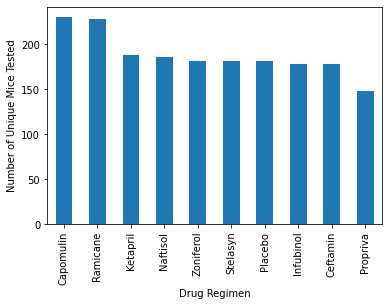

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_count = new_df.groupby(["Drug Regimen"], sort=True).count()["Mouse ID"]

unique_mice = drug_count.sort_values(ascending = False).plot(kind = "bar")
unique_mice.set_xlabel("Drug Regimen")
unique_mice.set_ylabel("Number of Unique Mice Tested")
plt.show()

In [23]:
drug_df.count()

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           148  148         148         148        148   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin                    230               230  
Ceftamin                     178               178  
Infubinol                    178               178  
Ketapril                     188               188  
Naftisol                     186               186  
Placebo                      181               181  
Propriva                     148               148  
Ramicane                     228               228  
Stelasyn                     181               181  
Zoniferol                    182               182

Text(0, 0.5, 'Number of Unique Mice Tested')

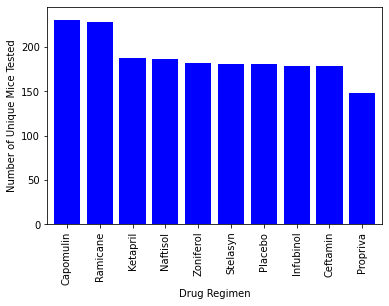

In [39]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x_axis = np.arange(0, len(drug_count))
ticks = [value+.4 for value in x_axis]
drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148] 
plt.bar(drugs, mice, color= 'b', align='edge')
plt.xticks(ticks, drugs, rotation = 'vertical')
plt.xlim(-0.2, len(x_axis))
plt.ylim(0, max(drug_count)+15)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")


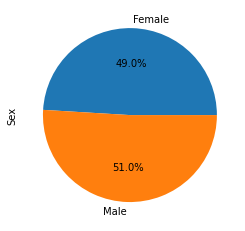

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ID_Sex = new_df[['Mouse ID', 'Sex']]

# Calculate total of each
Sex_grouping = ID_Sex.groupby('Sex')
counts = Sex_grouping['Sex'].count()
plot = counts.plot.pie(y='Sex', figsize=(4, 4), autopct='%1.1f%%')

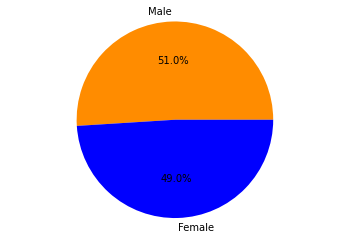

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [51, 49]
colors = ['darkorange', 'blue']
plt.pie(sizes, labels= labels, colors= colors, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


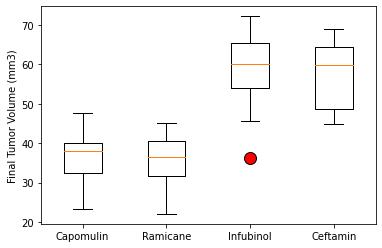

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

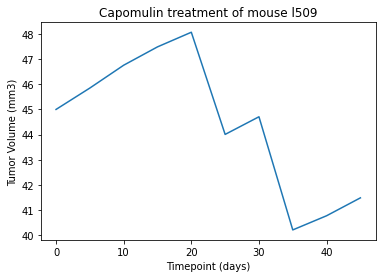

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



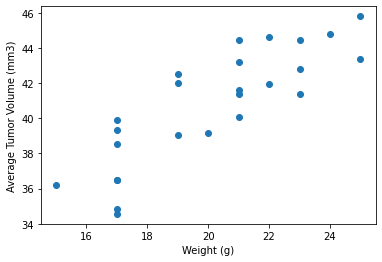

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


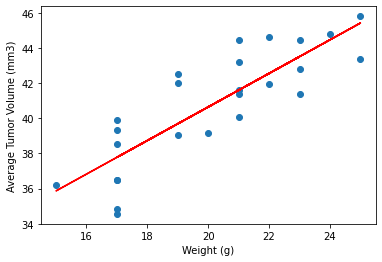

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

